In [17]:
%matplotlib inline
import random

In [27]:
def drawing_without_replacement_sim(numTrials):
    '''
    Runs numTrials trials of a Monte Carlo simulation
    of drawing 3 balls out of a bucket containing
    4 red and 4 green balls. Balls are not replaced once
    drawn. Returns a float - the fraction of times 3 
    balls of the same color were drawn in the first 3 draws.
    '''
    import random
    bucket = [1,1,1,1,2,2,2,2]
    result = 0
    for i in range(numTrials):
        draw = random.sample(bucket,3)
        if len(set(draw)) == 1:
            result += 1
    return result/numTrials

In [33]:
drawing_without_replacement_sim(100000)

0.14306

In [35]:
import pylab

In [40]:
def makeHistogram(values, numBins, xLabel, yLabel, title=None):
    """
      - values, a list of numbers
      - numBins, a positive int
      - xLabel, yLabel, title, are strings
      - Produces a histogram of values with numBins bins and the indicated labels
        for the x and y axes
      - If title is provided by caller, puts that title on the figure and otherwise
        does not title the figure
    """
    if title !=None:
        pylab.title(title)
    pylab.hist(values, numBins)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.show()

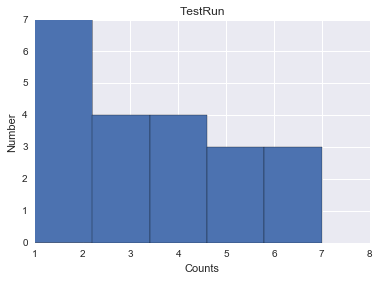

In [42]:
data = [1,2,3,4,5,4,3,2,1,2,3,4,5,6,7,6,5,4,3,2,1]
makeHistogram(data, 5, 'Counts', 'Number', 'TestRun')